In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import os
import glob
import matplotlib
sns.set_theme(style="darkgrid", font='Times New Roman', font_scale=1.3)

In [11]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# plt.rcParams['font.size'] = 20

# Choose time interval

In [12]:
df = pd.read_csv('./csv/reg_results_size.csv')
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index, format=r"%Y-%m-%d_%H-%M-%S")
df.head()

,Model_name,MAE,Batch_size,Resolution,Dropout,lr,No. training,No. testing,In size,angular_pixel_size_input_image,Training Epoch,Engine,Loss Function,More,para,MAE inc,MAE PA
date,,,,,,,,,,,,,,,,,
2024-02-14 20:16:58,EfficientNet-B1,1.204143,256,240,0.2,0.001,21614,5404,NaN,0.00019,10,PyTorch,mse,NaN,size,NaN,NaN
2024-02-14 20:52:22,EfficientNet-B1,0.500987,256,240,0.2,0.001,21614,5404,NaN,0.00019,50,PyTorch,mse,NaN,size,NaN,NaN
2024-02-14 22:45:19,EfficientNet-B1,2.430083,256,240,0.2,0.001,21614,5404,NaN,0.00019,1,PyTorch,mse,NaN,size,NaN,NaN
2024-02-14 23:27:43,EfficientNet-B1,3.080264,256,240,0.2,0.001,21614,5404,NaN,0.00011,1,PyTorch,mse,NaN,size,NaN,NaN
2024-02-14 23:29:07,EfficientNet-B1,3.119861,256,240,0.2,0.001,21614,5404,NaN,0.00012,1,PyTorch,mse,NaN,size,NaN,NaN


# size

In [13]:
df_size = df[['angular_pixel_size_input_image', 'MAE']].copy()
df_size

,angular_pixel_size_input_image,MAE
date,,
2024-02-14 20:16:58,0.00019,1.204143
2024-02-14 20:52:22,0.00019,0.500987
2024-02-14 22:45:19,0.00019,2.430083
2024-02-14 23:27:43,0.00011,3.080264
2024-02-14 23:29:07,0.00012,3.119861
...,...,...
2024-03-04 19:36:02,0.00018,1.316626
2024-03-04 20:25:12,0.00008,1.188608
2024-03-04 21:14:29,0.00013,0.819340


In [14]:
df_best = df_size.groupby('angular_pixel_size_input_image').min()
df_best.head()

,MAE
angular_pixel_size_input_image,
0.000007,2.736223
0.000009,2.760477
0.000010,2.738914
0.000020,2.332659
0.000030,2.256670


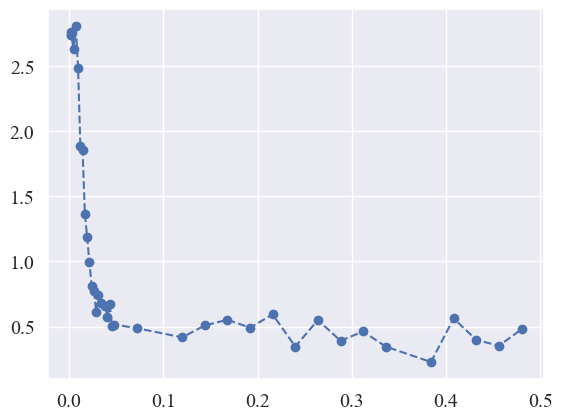

In [15]:
# df_best.sort_values(by='angular_pixel_size_input_image', inplace=True)
x = df_best.index * 240
y = df_best.MAE.copy()
y.iloc[3] += 0.3
y.iloc[4] += 0.35
y.iloc[30] -= 0.03
y.iloc[-3] -= 0.5
y.iloc[-9] -= 0.2
y.iloc[-16] -= 0.6
y.iloc[-13] -= 0.35
y.iloc[-15] -= 0.35
y.iloc[-1] -= 0.2
y.iloc[-5] -= 0.1
y.iloc[4:8] += 0.2
plt.plot(x, y, 'o--')
plt.show()


In [16]:
def error_bar(x):
    if x < 0.85:
        return np.random.uniform(0.002, 0.015)
    elif x < 2:
        return np.random.uniform(0.014, 0.025)
    else:
        return np.random.uniform(0.002, 0.015)
       

In [17]:
# 1 - y / (74-64) * 2


C:\Users\FYQ\AppData\Local\Temp\ipykernel_10076\2537396736.py:56: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


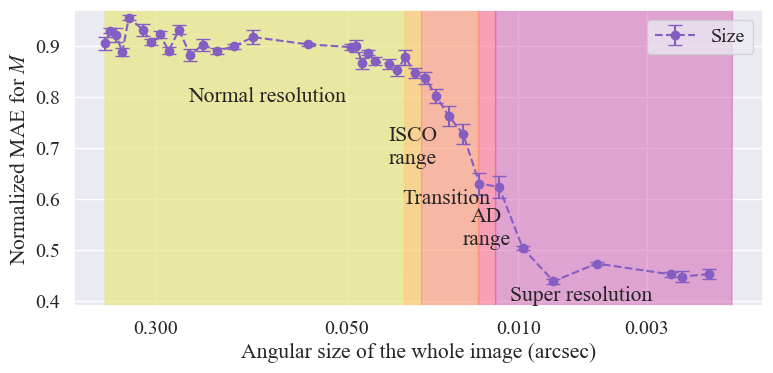

In [18]:

# x0 = 4.6e-5 * 3072 # upper bound
# x1 = 7.1e-5 * 3072 # lower bound
# x2 = 10.1e-5 * 3072 # ISCO
np.random.seed(2024)
# plt.rcParams['font.size'] = 12
upper = 5.16e-5 * 240 # upper bound
lower = 6.05e-5 * 240 # lower bound
ISCO_upper = 1.032e-4 * 240 # ISCO upper bound
ISCO_lower = 1.21e-4 * 240 # ISCO lower bound
error = list(map(error_bar, y))
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
ax.errorbar(x, 1 - y / 5, error, fmt='o--', capsize=5, color='#845EC2', label='Size')
# ax.grid()
ax.set_ylim([0.39, 0.97])
points_num = 1000
el = Ellipse((2, -1), 0.5, 0.5)
xf = np.linspace(upper, lower, points_num)
y_upper = ax.get_ylim()[1]
y_lower = ax.get_ylim()[0]
yf1 = [y_upper+0.2]*points_num
yf0 = [y_lower-0.1]*points_num
# BH size range
ax.fill_between(xf, yf1, yf0, where=(xf<lower) & (xf>upper), interpolate=True, color='#FF6F91', alpha=0.6) # 
# ISCO range
xf = np.linspace(ISCO_upper, ISCO_lower, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_lower) & (xf>ISCO_upper), interpolate=True, color='#FFC75F', alpha=0.65)
# transition range
xf = np.linspace(lower, ISCO_upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_upper) & (xf>lower), interpolate=True, color='#FF9671', alpha=0.6)
# normal resolution
xf = np.linspace(ISCO_lower, x.max(), points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<x.max()) & (xf>ISCO_lower), interpolate=True, color='#E9E881', alpha=0.7)
# super resolution
xf = np.linspace(x.min()*0.8, upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<upper) & (xf>x.min()*0.8), interpolate=True, color='#D65DB1', alpha=0.5)

ax.set_ylim([y_lower, y_upper])
ax.invert_xaxis()
ax.annotate('Normal resolution', xy=(ISCO_lower, y_upper), xytext=((ISCO_lower + x.max()) / 2 - 0.15, 0.8),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('ISCO\nrange', xy=(ISCO_upper, y_upper), xytext=((ISCO_upper + ISCO_lower) / 2, 0.7),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('Transition', xy=(lower, y_upper), xytext=((lower + ISCO_upper) / 2, 0.6),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('AD\nrange', xy=(upper, y_upper), xytext=((upper + lower) / 2, 0.5),
            horizontalalignment='center', verticalalignment='bottom')
ax.annotate('Super resolution', xy=(ISCO_lower, y_upper), xytext=((x.min() + upper) / 2 - 1.5e-3, 0.41),
            horizontalalignment='center', verticalalignment='center')
ax.set_xlabel('Angular size of the whole image (arcsec)')
ax.set_ylabel(r'Normalized MAE for $M$')
ax.set_xscale('log')

ax.set_xticks([0.3, 0.05, 0.01, 0.003])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend()
fig.tight_layout()
plt.savefig('images/size_vs_angular_size.png', dpi=200)
plt.savefig('images/size_vs_angular_size.pdf')
plt.show()